In [4]:
%load_ext autoreload
%autoreload 2
import os
import sys
import mne
import numpy as np
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from cerebra_atlas_python.cerebra import CerebrA, setup_logging
from cerebra_atlas_python.plotting import  plot_brain_slice_2D, get_cmap

array([[<AxesSubplot:xlabel='Y', ylabel='Z'>,
        <AxesSubplot:xlabel='X', ylabel='Z'>],
       [<AxesSubplot:xlabel='X', ylabel='Y'>, <AxesSubplot:>]],
      dtype=object)

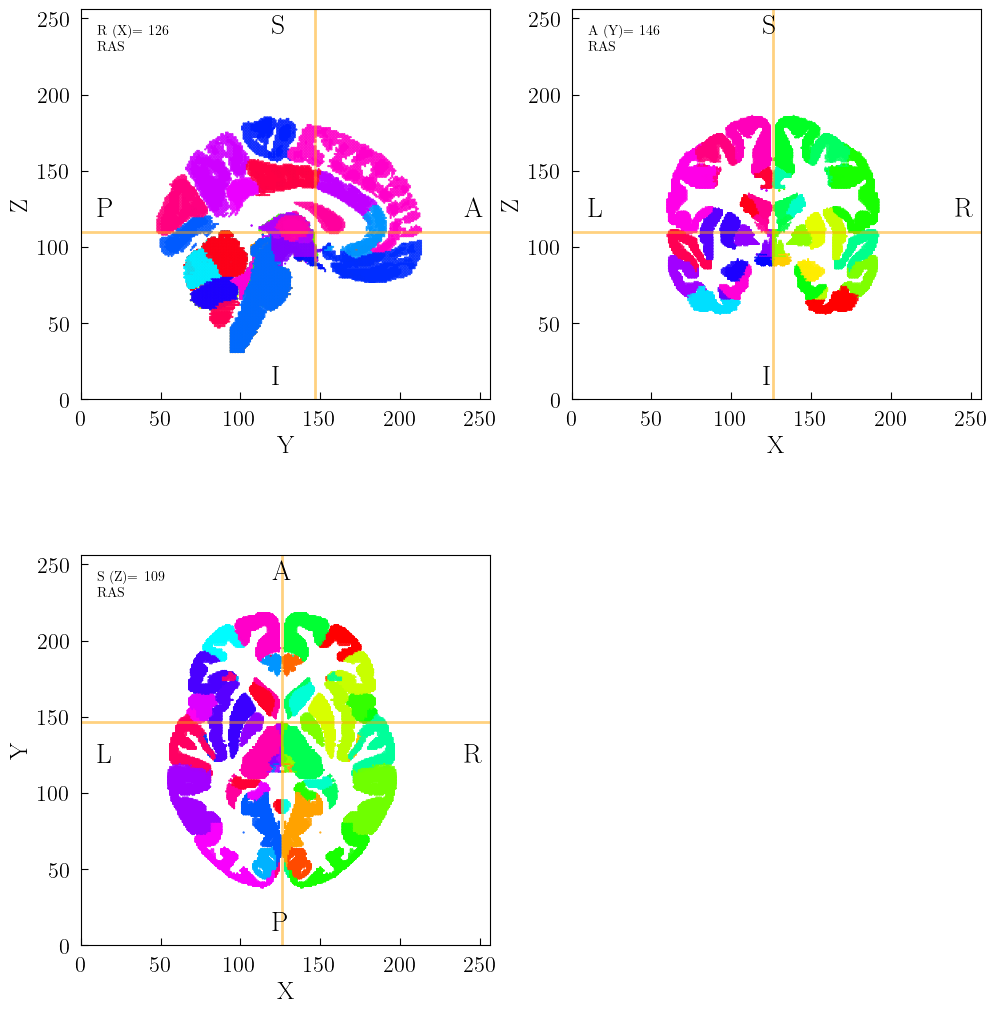

In [9]:
setup_logging(level="INFO")
cerebra = CerebrA()
cerebra.orthoview(plot_affine=True, plot_whitematter=False)

array([[<AxesSubplot:xlabel='Y', ylabel='Z'>,
        <AxesSubplot:xlabel='X', ylabel='Z'>],
       [<AxesSubplot:xlabel='X', ylabel='Y'>, <AxesSubplot:>]],
      dtype=object)

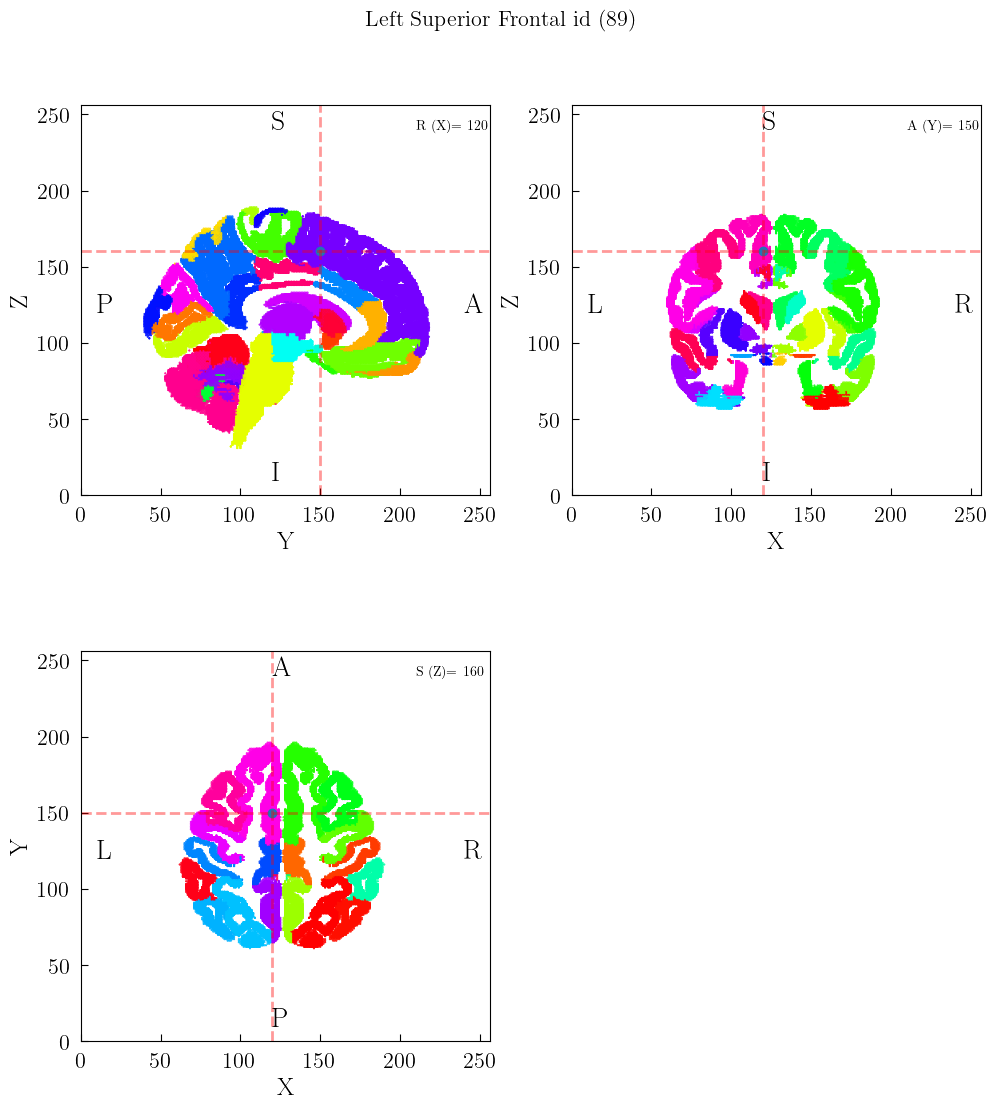

In [141]:
cerebra.orthoview(pt=[120, 150, 160])

In [151]:
cerebra.plot_region_orthoview(region_id=29)

array([[<AxesSubplot:xlabel='Y', ylabel='Z'>,
        <AxesSubplot:xlabel='X', ylabel='Z'>],
       [<AxesSubplot:xlabel='X', ylabel='Y'>, <AxesSubplot:>]],
      dtype=object)

array([[<AxesSubplot:xlabel='Y', ylabel='Z'>,
        <AxesSubplot:xlabel='X', ylabel='Z'>],
       [<AxesSubplot:xlabel='X', ylabel='Y'>, <AxesSubplot:>]],
      dtype=object)

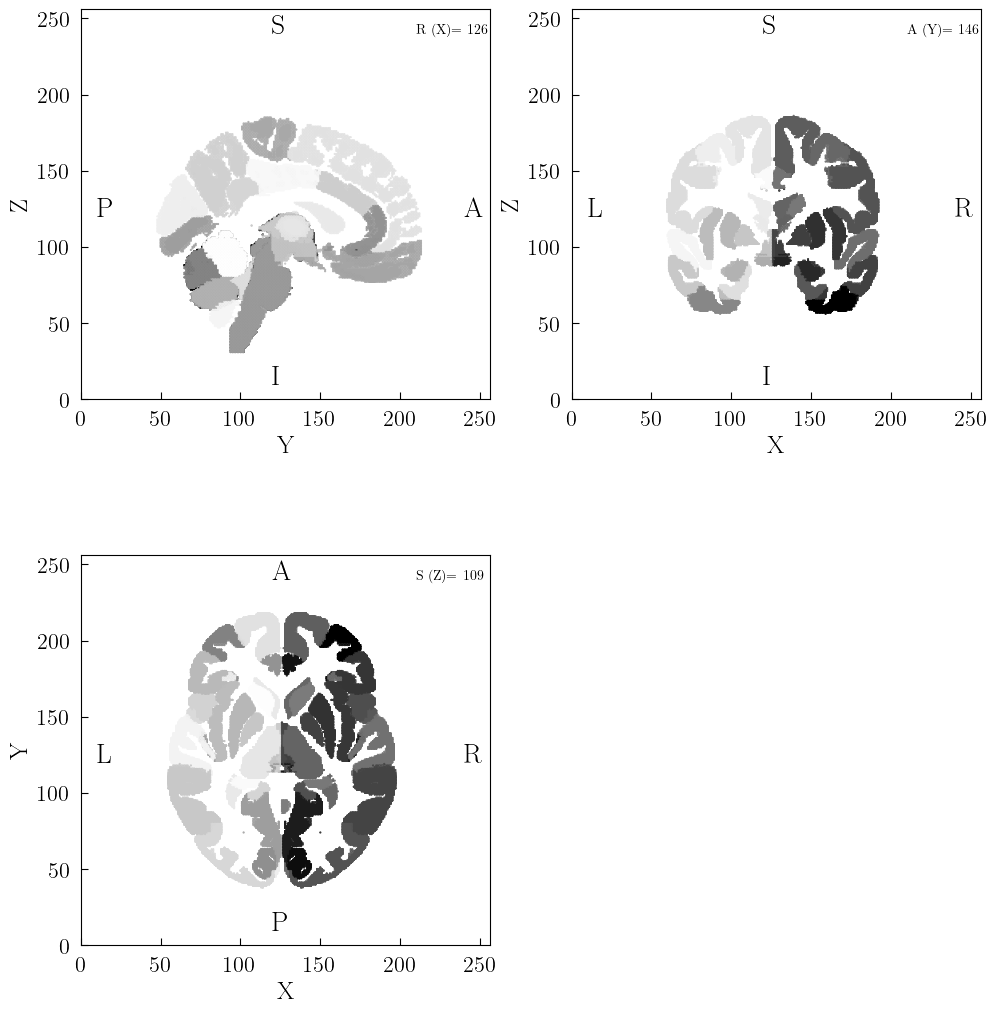

In [147]:
cerebra.orthoview(cmap_name="gray")

array([[<AxesSubplot:xlabel='Y', ylabel='Z'>,
        <AxesSubplot:xlabel='X', ylabel='Z'>],
       [<AxesSubplot:xlabel='X', ylabel='Y'>, <AxesSubplot:>]],
      dtype=object)

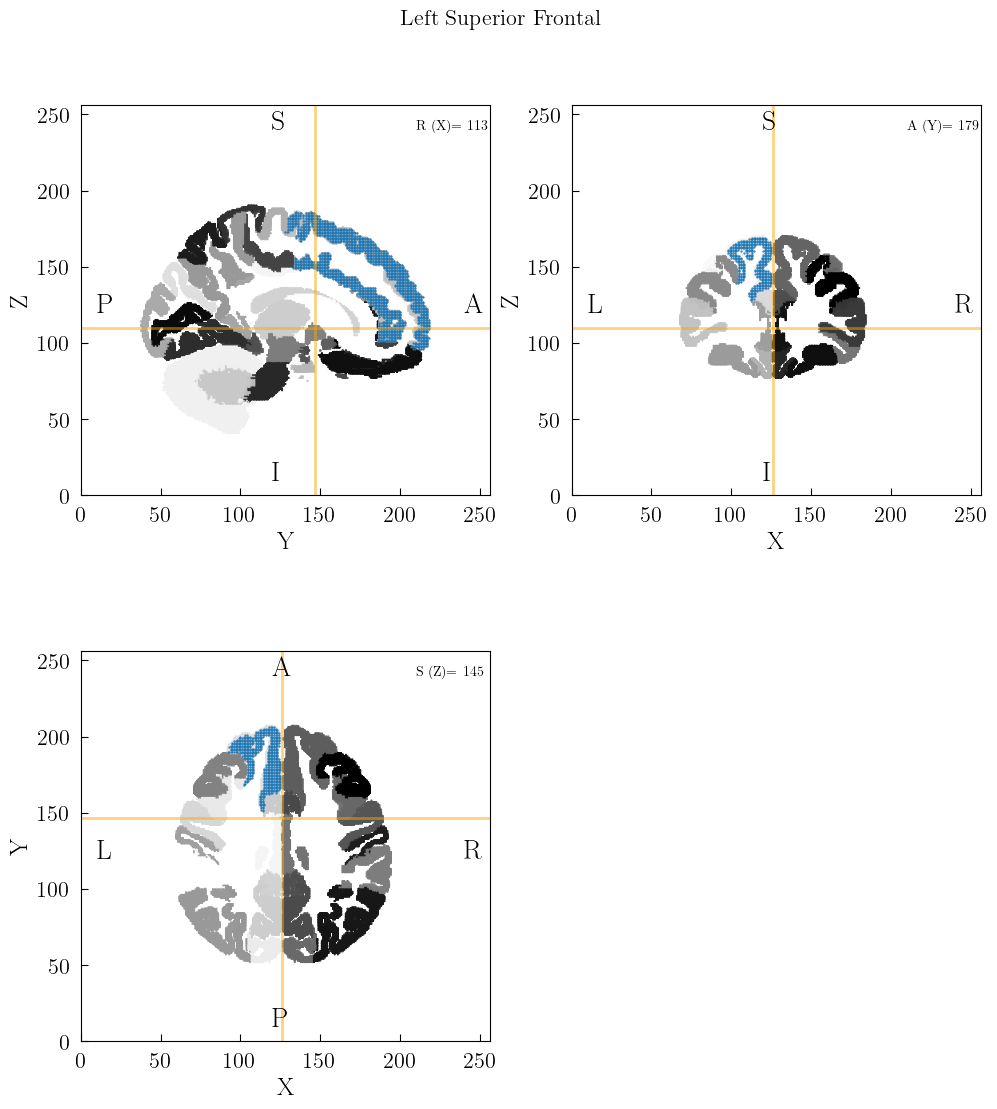

In [148]:
cerebra.plot_region_orthoview(region_id=89)

array([[<AxesSubplot:xlabel='Y', ylabel='Z'>,
        <AxesSubplot:xlabel='X', ylabel='Z'>],
       [<AxesSubplot:xlabel='X', ylabel='Y'>, <AxesSubplot:>]],
      dtype=object)

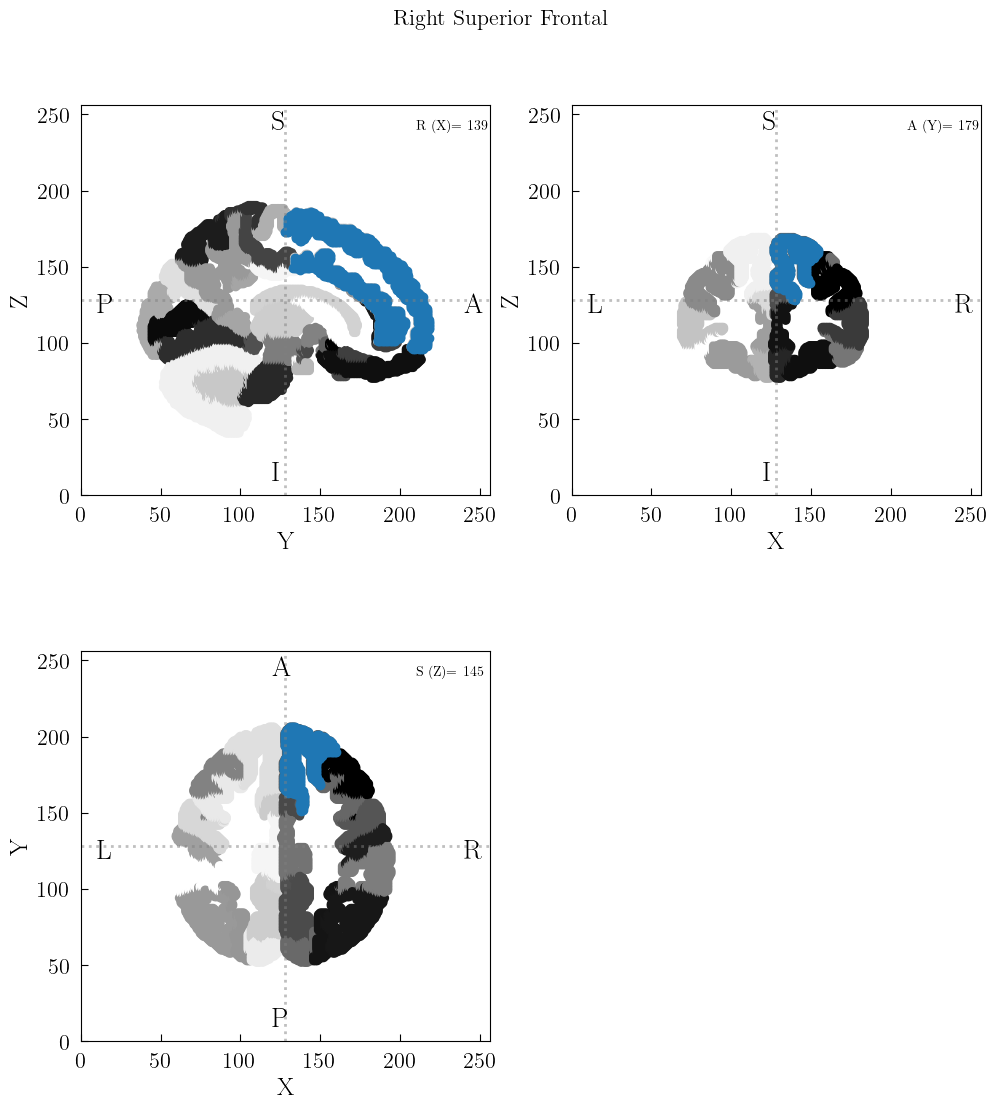

In [34]:
cerebra.plot_region_orthoview(region_id=89-51)

In [149]:
%matplotlib qt
cerebra.plot_3d()

In [150]:
cerebra.plot_region_3d(29)